# Hands-on 10: Modulação Digital em Canal com Desvanecimento (caracterização, modelagem e desempenho)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Entender a caracterização e modelagem de um canal com desvanecimento plano;
- Entender como gerar um canal com desvanecimento plano;
- Entender como fazer análise de desempenho de um enlace de comunicação digital sujeito a canais com ruído AWGN e desvanecimento plano (traçar e analisar curva BER vs $E_B/N_0$ via simulação de Monte Carlo).

# Manifestações do canal de comunicação

Um sinal ao passar pelo canal de comunicação está sujeito as manifestações do meio físico que atravessa. Para uma canal sem fio de RF, essas manisfestações são classificadas em dois grandes grupos: (i) desvanecimento de larga escala; e (ii) desvanecimento de pequena escala. Não esquecendo que além dessas manifestações, o ruído está sempre presente. A figura a seguir traz uma taxonomia e uma classificação das manisfetações clássicas de um canal sem fio RF.

![fig_manisf_canal](./FIGS/HD_10/manisf_canal.png)


O desvanecimento, ao contrario do ruído que é aditivo, são outras formas de atenuação do sinal caracterizadas como distúrbios multiplicativos. 

## Desvanecimento e larga escala (large scale fading)

São atenuações causadas pela interação da onda eletromagnética com o ar, que sofre reflexão, difração e refração. Ela é dita de larga escala porque uma variação significativa no sinal recebido só é percebida para deslocamentos da ordem de 10-1000 vezes o comprimento da onda transmitida.  Essa atenução também exibe uma forte dependência da distribuição de objetos grandes (comparados ao comprimentos de onda) entre transmissor e receoptor.

Quanto a modelagem, as manifestações de larga escala são classificadas em:

- **Path loss (perda de percurso):**  Atenuação média (medida em alguns comprimentos de onda) que o sinal sofre entre transmissor e receptor. Essa atenuação depedende principalmente da frequência da onda, da distância entre transmissor e receptor, da topografia do ambiente de propagação, e da altura das antenas do Tx e do Rx.

- **Shadowing (sombreamento):** Atenuação causada principalmente por reflexão e difração do sinal em grandes obstáculos. Como geralmente é difícil prevê quantos, e em qual configuração, estão os vários obstáculos entre Tx e Rx, esse fenômeno é modelado estatisticamente.  

## Desvanecimento de pequena escala (small scale fading)

Os fenômenos físicos associados ao desvanecimento de pequena escala são: 

- **Multipercursos**: o sinal no receptor é composto por vários sinais oriundos de diferentes caminhos entre o transmissor e o receptor. Cada réplica do sinal tem sua amplitude, seu retardo temporal e seu ângulo de chegada e quando se somam vetorialmente no receptor causam pontos de sinal forte e de sinais fracos. O principal efeito é o **espalhamento temporal do sinal (delay spread)**, como ilustrado na figura a seguir. 

![fig_multipath](./FIGS/HD_10/multipath.png)

- **Doppler:** Causado pela mobilidade realtiva entre Tx e Rx.  O principal efeito é o **espalhamento em frequência do sinal (doppler spread)**, como ilustrado na figura a seguir.

![fig_doppler](./FIGS/HD_10/doppler.gif)
![fig_doppler2](./FIGS/HD_10/doppler2.png)

Assim, o desvanecimento de pequena escala está associado a uma atenuação que pode se manisfetar no tempo e/ou frequência, podendo ter uma variação significativa ou não, quando uma **janela de interesse** é considerada. Dai surge o conceito de **seletividade** e **coerência**:

- Se um canal é **coerente**, ele não muda em função do tempo ou frequência dentro de uma **janela de interesse**;
- O oposto a coerência é **seletividade**. Um canal é dito **seletivo** se varia em função do tempo ou frequência  dentro de uma **janela de interesse**;

Algo muito importante considerando desvanecimento de pequena escala é descrever um canal sem fio afetado por algum tipo de seletividade. Sobre isso, podemos escrever:

- **Efeitos dos multipercursos**: Espalhamento temporal do sinal e, como consequência, uma distorção em frequência (alterações das componentes do espectro do sinal transmitido), como ilustra a figura a seguir. Se dentro da banda de interesse (**janela de interesse em frequência**) o desvanecimento varia, o canal é dito **com desvanecimento seletivo em frequência**. Os principais efeitos negativos são: ISI, mutilação do pulso, piso de BER (mesmo aumentando a SNR a BER continua a mesma). Caso contrário, o canal é dito **com desvanecimento plano em frequência**, causando perda de SNR.

![fig_efeitos_multipath](./FIGS/HD_10/efeitos_multipath.png)


- **Efeitos do Doppler**: Espalhamento em frequência do sinal e, como consequência, uma atenuação no tempo (variações de amplitude do sinal transmitido), como ilustra a figura a seguir. Se dentro de um tempo de interesse (**janela temporal de interesse**) o desvanecimento varia, o canal é dito **com desvanecimento rápido**. Os principais efeitos negativos são: distorção forma do pulso; piso de BER; problemas de sincronização de fase nos receptores.  Caso contrário, o canal é dito **com desvanecimento lento**, causando perda de SNR.

![fig_efeitos_doppler](./FIGS/HD_10/efeitos_doppler.png)


Ao combinar o efeito doppler com os efeitos de multipercursos, o sinal sofrerá espalhamento em frequência (doppler) e espalhamento temporal (multipercursos), como ilustra a figura a seguir.

![fig_doppler_multipath](./FIGS/HD_10/doppler_multipath.png)


### Canal completo

Ao considerarmos os desvanecimentos de larga e pequena escalas, o sinal recebido é composto de três partes: (i) perda de percurso; (ii) Sombreamento; e (iii) desvanecimento de pequena escala. Esses efeitos se somam em dB (se multiplicam em escala linear), como ilustra a figura a seguir.


![fig_Manifestacoes_canal](./FIGS/HD_10/Manifestacoes_canal1.png)
![fig_Manifestacoes_canal](./FIGS/HD_10/Manifestacoes_canal.png)


Nesse Hands-On Será abordado apenas desvanescimento de baixa escala.


# Caracterização dos desvanecimentos para análise de desempenho de modulação digital

Como exposto em [Hands-on 09: Modulação Digital (modulação, demodulação e desempenho em ruído AWGN) - Parte 01
](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004_LabPSC/blob/master/h09_1.ipynb), uma maneira muito tradicional (e funcional) de mostrar o desempenho de um enlace de comunicação é por meio das curvas $P_e$ teórica vs $E_b/N_0$ e BER simulada vs $E_b/N_0$, geralmente com $Pe$ e BER em escala logarítmica e $E_b/N_0$ em dB. Ela serve para comparar o desempenho de diferentes modulações bem como a análise de valor agregado de codificadores de canal e estratégias de multiplexação, por exemplo. 

Como a variação de SNR é feita como um parâmetro de entrada, não faz muito sentido analisar casos que o ponto de Tx e o de Rx estejam dispostos em diferentes posições. Assim, em tais análises, o desvanecimento de larga escala geralmente não é modelado. Contudo, é importante modelar a variação rápida temporal e/ou seletiva em frequência do sinal, pois são manifestações que ocorrem com menor granularidade (temporal ou em frequência) e tem grande impacto no desempenho de um enlace. Essa caracterização é um dos objetos desse hands-on.

Os efeitos de pequena escala podem ser escritos como um filtro linear que modela $n$ multipercursos cada qual possuindo um determinado atraso $\tau$ e amplitudes $\alpha$. A resposta ao impulso $h(t)$ do canal pode ser escrita como:

$$ h(t)= \sum_{n} \alpha _{n}(t) e^\left [ 2 \pi fc \tau _{n}(t)\right] \delta (t - \tau _{n}(t)) $$

O termo $\alpha _{n}(t)$ representa a atenuação de cada réplica do sinal, enquanto que $e^\left [ 2 \pi fc \tau _{n}(t)\right]$ representa o atraso de propagação e outros desvios de fase (e.g. doppler).

Analisando a transmissão de uma portadora senoidal não modulada $s(t)= A \cdot cos(2 \pi f_{c} t)$, o sinal recebido na presença do ruído n(t) pode ser expresso da seguinte forma:

$$ r(t)= A \sum_{n} \alpha _{n}(t) \cdot cos[2 \pi f_{c} (t - \tau _{n}(t))] + n(t) =  A \cdot Re  \left [  \sum_{n} \alpha _{n}(t) e^{-j 2 \pi f_{c} \tau _{n}(t)} \cdot e^{j 2 \pi f_{c} t}  \right ] + n(t)$$


Escrevendo $c(t) = \sum_{n} \alpha _{n}(t) \cdot e^{-j 2 \pi f_{c} \tau _{n}(t)} $, o sistema pode ser modelado como na figura a seguir.

![Figura01](./FIGS/HD_10/desvanecimento_plano.png)


Logo, o sinal $c(t)$ pode ser escrito como:
$$c(t) = \sum_{n} \alpha _{n}(t) \cdot e^{-j 2 \pi f_{c} \tau _{n}(t)} = \sum_{n} \alpha _{n}(t) \cdot e^{-j \phi _{n}(t)}$$

Ele representa a resposta do canal como um somatório de exponenciais complexas. Podemos verificar que apesar da entrada do sinal ser de uma frequencia só (sinal portadora), a saída do canal é um sinal que contém múltiplas componentes de frequência, as quais foram geradas pelo resultado das variações do tempo na resposta do canal. Isso é mais uma evidência que o canal pode ser modelado por um filtro. 

O valor complexo do ganho do canal pode ser expressado da seguinte forma:

$$  c(t)= c_{R}(t)+jc_{I}(t) =\alpha(t) \cdot e^{j\phi(t)},$$

sendo:

$$\alpha(t)=\sqrt{c_{R}^{2}(t)+c_{I}^{2}(t)} $$
$$ \phi(t)=arctan \left ( \frac{c_{I}}{c_{R}} \right ) $$

Quando $c(t)$ consiste de uma série de componentes de multipercurso com amplitudes aleatórias e fases uniformemente distribuídas, as componentes $c_{r}(t)$ e  $c_{i}(t)$ são modelados geralmente por variáveis aleatórias com distribuição normal (teorema central do limite). Como consequência, $\alpha (t)$ é caracterizado estatisticamente como uma variável aleatória com distribuição de probabilidade do tipo Rayleigh, enquanto que $\phi (t)$ é uniformemente distribuida num intervalo de $(0,2\pi)$. Assim, o canal é chamado de **Rayleigh Fading channel**. A PDF do desvanecimento de Rayleigh é descrita pela seguinte equação:

$$f(\alpha)=\frac {\alpha^{2}}{\sigma^{2}} \cdot  e^{\frac{-\alpha^{2}}{\sigma^{2}}}, \; \alpha \geq 0 $$

Sendo $f(\alpha)=0$ para $\alpha < 0 $. O parâmetro $\sigma^{2}=E[c_{r}^{2}]=E[c_{i}^{2}]$.



A CDF da distribuição rayleigh é dada pela seguinte equação:
$$f(x)=1-e^{\frac{-x^{2}}{2\sigma^{2}}} = u, \; {\rm com} \;  0\leq u\leq1 $$

Aplicando _ln()_ nos dois lados:
$$ ln(1-u)=ln(e^{\frac{-x^{2}}{2\sigma^{2}}}) \Rightarrow  \frac{-x^{2}}{2\sigma^{2}} = ln(1-u)$$

Agora, isolando $x$:

$$ x^{2}=-2\sigma^{2}ln(1-u) \Rightarrow   x=\sqrt{-2\sigma^{2}ln(1-u)}$$

Como $ 0\leq1-u\leq1$ sendo $u$ uma variável aleatória com distribuição uniforme de 0 a 1, podemos simplesmente substituir por:
$$ x=\sqrt{2\sigma^{2}ln(u)}$$

Outro aspecto a se destacar em um canal sem fio é a existência ou ausência de uma onda direta entre Tx e Rx. Nesse aspecto, um canal sem fio é classificado como apresentando LOS (Line-of-Sight ou linha de visada) e NLOS (Non-Line-of-Sight ou sem linha de visada).

- NLOS (Non-Line-of-Sight) é caracterizada pela ausência de componentes fortes de sinal entre transmissor e receptor, fazendo com que o sinal recebido seja composto por réplicas do sinal transmitido que sofrem atenuações semelhantes. A figura a seguir ilustra tal situação.
![fig_NLOS](./FIGS/HD_10/NLOS.png)
Nessa situação, não é identificada uma componente principal do sinal cuja intensidade é muito maior que as demais. Assim, o desvanecimento de pequena escala de um canal sem fio, sujeito a esse tipo de situação, pode ser representado por uma variável aleatória complexa  $W = W_{1}+j\cdot W_{2}$, sendo as componentes real e complexas independentes entre si. Pelo teorema central do limite, essas variáveis tem distribuição Gaussiana com média $\mu = 0$ e uma variância de $\sigma^{2}$. Então, como já explicado anteriormente, a função densidade de probabilidade da envoltória do sinal recebido $\alpha(t)$  é Rayleigh. 

- LOS (Line-of-Sight) é caracterizada pela existência de uma onda direta entre a antena transmissora e receptora.  A figura a seguir ilustra tal situação.
![fig_LOS](./FIGS/HD_10/LOS.png)
Nessa situação, existe  uma componente principal do sinal cuja intensidade é muito maior que as demais. Consequentemente, o desvanecimento de pequena escala, sujeito a esse tipo de situação, não será mais do tipo Rayleigh, mas do tipo Rice (Rician).

Assim, o modelo de desvanecimento Rice é utilizado para simular ambientes que produzem componentes de múltiplo percurso em adição a uma componente principal (dominante) em linha de visada, ou LOS (*Line of Sight*). A componente LOS é chamada de especular e as componentes de múltiplo percurso são chamadas de aleatórias ou de espalhamento. Enquanto a distribuição das componentes aleatórias tem média nula, a distribuição da componente especular tem média não-nula. 

Considere as variáveis aleatórias $X$ e $Y$, sendo que $X$ representa a componente LOS, e que $Y$ representa as componentes NLOS. Por definição, $X$ tem média não-nula ($m_{1} = s$), $Y$ tem média nula ($m_{2} = 0$) e ambas têm variância igual a $\sigma^{2}$. Dessa forma, a $Z = \sqrt{X^{2}+Y^{2}}$ é uma distribuição Rice. 

Uma vez que as componentes possuem médias diferentes, definimos um parâmetro de não-centralidade como:
$$ s =  \sqrt{m_{1}^{2}+m_{2}^{2}} = \sqrt{s^{2}+0} $$

O parâmetro de não centralidade é causado pela predominância do percurso dominante (LOS) no ambiente de desvanecimento. Devido a isso, o fator Riciano K determina a razão entre as potências dominantes e remanescentes como:

$$ K = \frac{Potência \enspace LOS}{Potência \enspace NLOS} $$ 

A versão estatística de K representa a potência do envelope desvanecido, que foi produzida pelas médias de $X$ e $Y$:

$$ K = \frac{m_{1}^{2}+m_{2}^{2}}{2\sigma^2} = \frac{s^2}{2\sigma^2}  \enspace (1)$$ 

Um canal com desvanecimento Rice é definido pelos seguintes parâmetros:

1. Fator Riciano $K$;
2. A potência total da componente LOS e NLOS: ($s^2 + 2\sigma^2$).

Podemos definir $s$ e $\sigma$, de modo que satisfaçam a equação (1), como:

$$ s = \frac{K}{K+1}\cdot Potência \enspace Total $$

$$ \sigma = \frac{Potência \enspace Total}{\sqrt{2(K+1)}} $$

# Prática 1: Geração de Desvanecimento Rayleigh


# Prática 2: Geração de Desvanecimento Rice

# Prática 3: Desempenho de modulação digital sujeito a Desvanecimento  Rayleigh

# Prática 4:  Desempenho de modulação digital sujeito a Desvanecimento  Rice



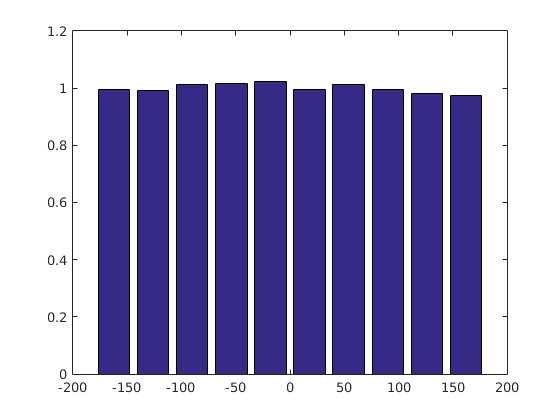

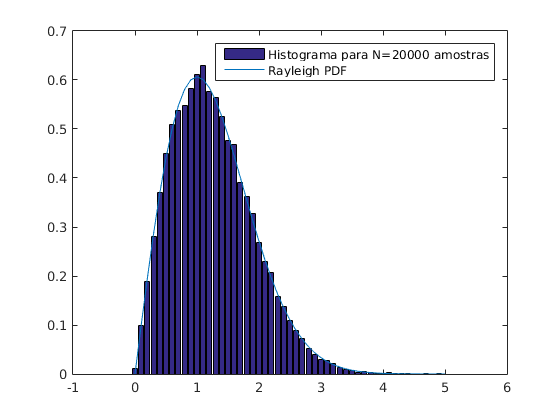

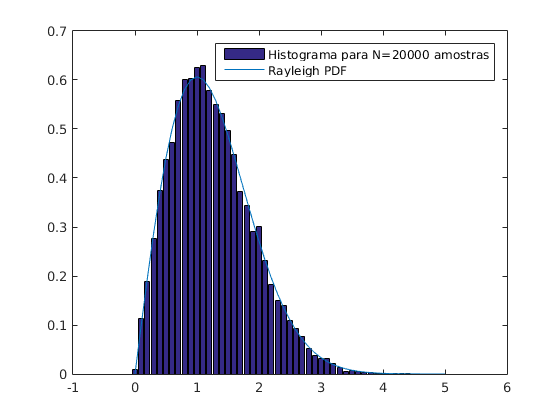

In [12]:
% Rayleigh1.m
clc; clear all;close all;
%% Parâmetros
N=20000;                                    % Número de amostras
ts = 0.1;
x=0:ts:5;                                  % Eixo x
sigma=1;                                    % Parâmetro Rayleigh
u=rand(1,N);                                % Amostras aleatórias
%% Montagem do canal
r=sigma*sqrt(-2*log(u));                    % Dados aleatorios da distribuição Rayleigh
r_ac= x/(sigma^2).*exp(-(x/sigma).^2/2);    % Rayleigh PDF

%% plotting
%subplot(2,1,1)
[xh, temp]=hist(r,x);
bar(temp,xh/(sum(xh)*ts))
%axis([0 5 0 1500])
hold on
%axis([0 5 0 1500])
%subplot(2,1,2)
plot(x,r_ac)
legend('Histograma para N=20000 amostras','Rayleigh PDF')


figure;
rr = (randn(1,N)+j*randn(1,N));
[xhr, tempr]=hist(abs(rr),x);
bar(tempr,xhr/(sum(xhr)*ts))
hold on
plot(x,r_ac)
legend('Histograma para N=20000 amostras','Rayleigh PDF')

figure;
[xhra, tempra]=hist(angle(rr));
bar(180/pi*tempra,xhra/(sum(xhra)*ts))

Reference to a cleared variable r.



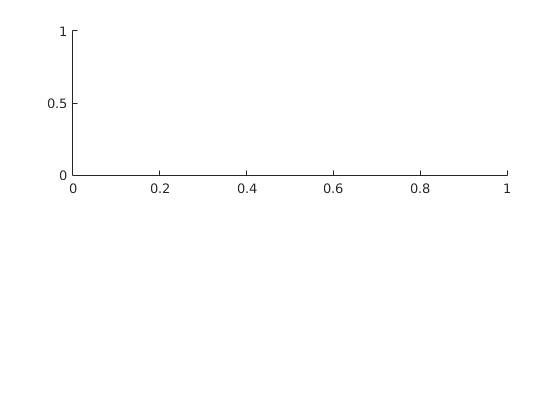

In [11]:
% Rayleigh2.m
clc; clear all;close all;
%% Parâmetros
N=20000;                                    % Número de amostras
x=0:0.1:5;                                  % Eixo x
sigma=1;                                    % Parâmetro Rayleigh
u=rand(1,N);                                % Amostras aleatórias
r_ac= x/(sigma^2).*exp(-(x/sigma).^2/2);    % Rayleigh PDF
%% gerando com Gaussianas
rr = sqrt(randn(1,N).^2 + randn(1,N).^2);
figure;
[temp,x]=hist(abs(rr));
plot(x,temp)
%% plotting
subplot(2,1,1)
hist(r,x)
axis([0 5 0 1500])
title('Histograma para N=20000 amostras')
axis([0 5 0 1500])
subplot(2,1,2)
plot(x,r_ac)
title('Rayleigh PDF')